# 1. Ecuación logística

In [155]:
#Importación de las librerías
import sympy as sp #métodos numéricos
import numpy as np #vectores
import scipy as pp #calculos simbólicos
import matplotlib as mpl
import matplotlib.pyplot as plt #generación de gráficos

In [156]:
#Definición de las variables independiente (t) y dependiente (p)
t=sp.symbols('t')
p=sp.Function('p')
#Parámetros de la ecuación de forma simbólica
a=sp.symbols('a')
b=sp.symbols('b')
p0=sp.symbols('p0')

In [157]:
#Escribimos la ecuación
ode1=sp.Eq(sp.Derivative(p(t),t)-a*p(t)+b*p(t)*p(t),0)
#Impirmir la ecuación
ode1

Eq(-a*p(t) + b*p(t)**2 + Derivative(p(t), t), 0)

In [158]:
#Resolver la ecuación anterior e imprimir
sol = sp.dsolve(ode1,p(t),ics={p(0):p0})
sol

Eq(p(t), a*exp(a*(t + log(b*p0/(-a + b*p0))/a))/(b*(exp(a*(t + log(b*p0/(-a + b*p0))/a)) - 1)))

In [159]:
#Asignación de valores para los parámetros de la ecuación a, b, p0
    #Primer ejemplo
constants={a:0.03,b:0.0001,p0:5}
    #Solución de la ecuación con las constantes dadas
sol1=sol.subs(constants)
sol1

Eq(p(t), -5.08474576271187*exp(0.03*t)/(-0.0169491525423729*exp(0.03*t) - 1))

In [160]:
#Asignación de valores para los parámetros de la ecuación a, b, p0
    #Segundo ejemplo
constants={a:0.03,b:0.0001,p0:6}
    #Solución de la ecuación con las constantes dadas
sol2=sol.subs(constants)
sol2

Eq(p(t), -6.12244897959184*exp(0.03*t)/(-0.0204081632653061*exp(0.03*t) - 1))

In [161]:
#Asignación de valores para los parámetros de la ecuación a, b, p0
    #Tercer ejemplo
constants={a:0.03,b:0.0001,p0:7}
    #Solución de la ecuación con las constantes dadas
sol3=sol.subs(constants)
sol3

Eq(p(t), -7.16723549488055*exp(0.03*t)/(-0.0238907849829352*exp(0.03*t) - 1))

In [162]:
#Definción de funciones a partir de sol1, sol2 y sol3
func1 = sp.lambdify(t,sol1.rhs,'numpy')
func2 = sp.lambdify(t,sol2.rhs,'numpy')
func3 = sp.lambdify(t,sol3.rhs,'numpy')

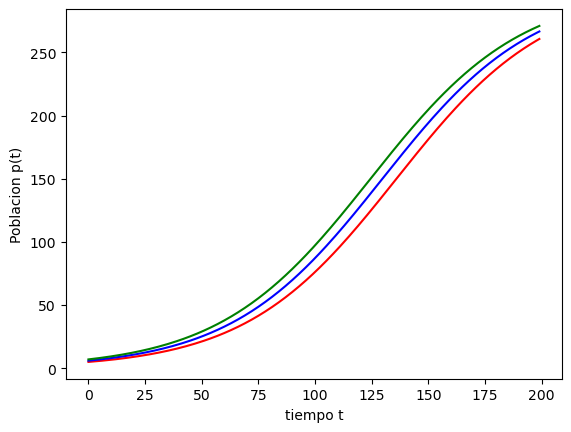

In [163]:
#Gráfica
    #Función para especificar los valores de la gráfica
tt = np.arange( 0, 200, 1) #los argumentos son con respecto al rango, dominio y partición dada
    #Llamado de las funciones dadas
pp1 = func1(tt)
pp2 = func2(tt)
pp3 = func3(tt)
    #Datos del gráfico
plt.plot(tt,pp1,'r',tt,pp2,'b',tt,pp3,'g')
plt.xlabel('tiempo t')
plt.ylabel('Poblacion p(t)')
plt.show()

# 2. Ecuación de Lagrange

In [165]:
#Importación de las librerías
import sympy as sp #métodos numéricos
#multiplicación
from sympy import * 

In [166]:
#Variable independiente y dependiente
x=sp.symbols('x')
y=sp.Function('y')

In [167]:
#Escribimos la ecuación y la imprimimos
ode2=sp.Eq(log(sp.Derivative(y(x),x))+2*x*sp.Derivative(y(x),x)-y(x),0)
ode2

Eq(2*x*Derivative(y(x), x) - y(x) + log(Derivative(y(x), x)), 0)

In [168]:
#Resolver la ecuación anterior e imprimir
sol2=sp.dsolve(ode2,y(x))
sol2

Eq(C1 - y(x) - log(LambertW(2*x*exp(y(x))) + 2) + LambertW(2*x*exp(y(x))), 0)

# 3. Resonancia

In [170]:
#Importación de las librerías
import sympy as sp #métodos numéricos
#Multiplicación
from sympy import *
import numpy as np #vectores
import scipy as pp #calculos simbólicos
import matplotlib as mpl
import matplotlib.pyplot as plt #generación de gráficos

In [171]:
#Variable independiente y dependiente
t=sp.symbols('t')
y=sp.Function('y')

In [172]:
#Escribimos la ecuación y la imprimimos
ode3=sp.Eq(sp.Derivative(y(t),t,t)+16*y(t)-8*sin(4*t),0)
ode3

Eq(16*y(t) - 8*sin(4*t) + Derivative(y(t), (t, 2)), 0)

In [173]:
#Resolver la ecuación anterior e imprimir
sol3=sp.dsolve(ode3,y(t))
sol3

Eq(y(t), C2*sin(4*t) + (C1 - t)*cos(4*t))

In [174]:
#Obtención de las constantes a partir de las condiciones iniciales
const=sp.solve([sol3.rhs.subs(t,0)-1,sol3.rhs.diff(t,1).subs(t,0)-0])
#Caracterización de las constantes
C1,C2=sp.symbols('C1,C2')
#impresión de las constantes
const

{C1: 1, C2: 1/4}

In [175]:
#Impresión de la solución con las constantes calculadas
sol3=sol3.subs(const)
sol3

Eq(y(t), (1 - t)*cos(4*t) + sin(4*t)/4)

In [176]:
#Definción de la función a partir de sol3
func1 = sp.lambdify(t,sol3.rhs,'numpy')
#Función para especificar los valores de la gráfica
xx = np.arange(0,10,.1)
yy1 = func1(xx)

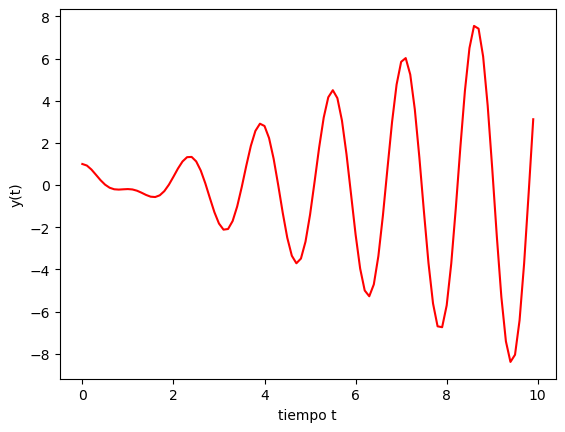

In [177]:
#Datos del gráfico
plt.plot(xx,yy1,'r')
plt.xlabel('tiempo t')
plt.ylabel('y(t)')
plt.show()

# 4. Ecuación de tercer orden

In [179]:
#Importación de las librerías
import sympy as sp #métodos numéricos
#multiplicación
from sympy import * 

In [180]:
#Variable independiente y dependiente, y la función de la igualdad
t=sp.symbols('t')
y=sp.Function('y')
g=sp.Function('g')

In [181]:
#Escribimos la ecuación y la imprimimos
    #Ecuación no homogénea
ode4=sp.Eq(sp.Derivative(y(t),t,3)-sp.Derivative(y(t),t,t)-sp.Derivative(y(t),t)+y(t)-g(t),0)
ode4

Eq(-g(t) + y(t) - Derivative(y(t), t) - Derivative(y(t), (t, 2)) + Derivative(y(t), (t, 3)), 0)

In [182]:
#Resolver la ecuación anterior e imprimir
sol4=sp.dsolve(ode4,y(t))
sol4

Eq(y(t), (C1 + Integral(g(t)*exp(t), t)/4)*exp(-t) + (C2 + t*(C3 + Integral(g(t)*exp(-t), t)/2) - Integral((2*t + 1)*g(t)*exp(-t), t)/4)*exp(t))

# 5. Una ecuación homogénea de Cauchy-Euler de cuarto orden

In [184]:
#Importación de las librerías
import sympy as sp #métodos numéricos
#multiplicación
from sympy import * 

In [185]:
#Variable independiente y dependiente
t=sp.symbols('t')
y=sp.Function('y')

In [186]:
#Escribimos la ecuación y la imprimimos
ode5=sp.Eq(x**4*sp.Derivative(y(x),x,4)+6*x*x*x*sp.Derivative(y(x),x,3)+9*x**2*sp.Derivative(y(x),x,2)+3*x*sp.Derivative(y(x),x)+y(x),0)
ode5

Eq(x**4*Derivative(y(x), (x, 4)) + 6*x**3*Derivative(y(x), (x, 3)) + 9*x**2*Derivative(y(x), (x, 2)) + 3*x*Derivative(y(x), x) + y(x), 0)

In [187]:
#Resolver la ecuación anterior e imprimir
sol5=sp.dsolve(ode5,y(x))
sol5

Eq(y(x), C3*sin(log(x)) + C4*cos(log(x)) + (C1*sin(log(x)) + C2*cos(log(x)))*log(x))

In [188]:
#Sustitución de y=x^n para simplificar la ecuación
n=sp.symbols('n')
eq=simplify(ode5.subs(y(x),x**n))
factor(eq)

Eq(x**n*(n**2 + 1)**2, 0)

# 6. Un problema de valor inicial con deltas de Dirac como fuentes

In [221]:
#Importación de las librerías
import sympy as sp #métodos numéricos
#multiplicación
from sympy import * 

In [223]:
#Variable independiente y dependiente
t=sp.symbols('t')
y=sp.Function('y')

In [225]:
#Escribimos la ecuación y la imprimimos
ode6=sp.Eq(sp.Derivative(y(t),t,2)-4*sp.Derivative(y(t),t,1)+4*y(t),3*DiracDelta(t-1)+DiracDelta(t-2))
ode6

Eq(4*y(t) - 4*Derivative(y(t), t) + Derivative(y(t), (t, 2)), DiracDelta(t - 2) + 3*DiracDelta(t - 1))

In [227]:
#Resolver la ecuación anterior e imprimir
sol6=sp.dsolve(ode6)
sol6

Eq(y(t), (C1 + t*(C2 + exp(-4)*Heaviside(t - 2) + 3*exp(-2)*Heaviside(t - 1)) - 2*exp(-4)*Heaviside(t - 2) - 3*exp(-2)*Heaviside(t - 1))*exp(2*t))

In [231]:
#Obtención de las constantes a partir de las condiciones iniciales
constants=solve([sol6.rhs.subs(t,0)-1,sol6.rhs.diff(t,1).subs(t,0)-1])
#impresión de las constantes
constants

{C1: 1, C2: -1}

In [233]:
#Solución con las constantes
sol6.subs(constants)
sol6

Eq(y(t), (C1 + t*(C2 + exp(-4)*Heaviside(t - 2) + 3*exp(-2)*Heaviside(t - 1)) - 2*exp(-4)*Heaviside(t - 2) - 3*exp(-2)*Heaviside(t - 1))*exp(2*t))

# 7. Sistema masa-resorte

In [236]:
#Importación de las librerías
import sympy as sp #métodos numéricos
#multiplicación
from sympy import * 

In [238]:
#Definición de las variables independiente (t) y dependiente (p)
t=sp.symbols('t')
y=sp.Function('y')
#Parámetros de la ecuación de forma simbólica
m=sp.symbols('m')
a=sp.symbols('a')
k=sp.symbols('k')

In [240]:
#Escribimos la ecuación y la imprimimos
ode7=sp.Eq(m*sp.Derivative(y(t),t,2)+k*exp(-a*t)*y(t),0)
ode7

Eq(k*y(t)*exp(-a*t) + m*Derivative(y(t), (t, 2)), 0)

In [244]:
#Solución con las constantes
sol7=sp.dsolve(ode7,y(t))
sol7
#solución expresada en serie de potencias

Eq(y(t), C2*(k**2*t**4*exp(-2*a*t)/(24*m**2) - k*t**2*exp(-a*t)/(2*m) + 1) + C1*t*(-k*t**2*exp(-a*t)/(6*m) + 1) + O(t**6))

# 8. Problema de valor inicial para un sistema de ecuaciones lineales

In [260]:
#Importación de las librerías
import sympy as sp #métodos numéricos
import numpy as np #vectores
import scipy as pp #calculos simbólicos
import matplotlib as mpl
import matplotlib.pyplot as plt #generación de gráficos
#Multiplicación
from sympy import *

In [262]:
#Definición de la variable independiente y las funciones
t=sp.symbols('t')
x, y = sp.symbols('x y',cls=Function)

In [264]:
#Escribimos las ecuaciones del sistema
eqs=[Eq(x(t).diff(t),3*x(t)-18*y(t)), Eq(y(t).diff(t),2*x(t)+9*y(t))]
#Visualización de la primer ecuación
eq1=Eq(x(t).diff(t),3*x(t)-18*y(t))
eq2=Eq(y(t).diff(t),2*x(t)+9*y(t))
eq1

Eq(Derivative(x(t), t), 3*x(t) - 18*y(t))

In [266]:
#Visualización de la segunda ecuación
eq2

Eq(Derivative(y(t), t), 2*x(t) + 9*y(t))

In [268]:
#Solución del sistema
sol8=sp.dsolve(eqs,[x(t),y(t)])
sol8

[Eq(x(t), -(3*C1/2 + 3*sqrt(3)*C2/2)*exp(6*t)*cos(3*sqrt(3)*t) - (3*sqrt(3)*C1/2 - 3*C2/2)*exp(6*t)*sin(3*sqrt(3)*t)),
 Eq(y(t), C1*exp(6*t)*cos(3*sqrt(3)*t) - C2*exp(6*t)*sin(3*sqrt(3)*t))]

In [270]:
#Obtención de las constantes a partir de las condiciones iniciales
C1, C2 = sp.symbols('C1,C2')
constants=solve((sol8[0].subs(t,0).subs(x(0),0),sol8[1].subs(t,0).subs(y(0),1)),{C1,C2})
constants

{C1: 1, C2: -sqrt(3)/3}

In [272]:
#Solución para x
xsoln=expand(sol8[0].rhs.subs(constants))
xsoln

-2*sqrt(3)*exp(6*t)*sin(3*sqrt(3)*t)

In [274]:
#Solución para y
ysoln=expand(sol8[1].rhs.subs(constants))
ysoln

sqrt(3)*exp(6*t)*sin(3*sqrt(3)*t)/3 + exp(6*t)*cos(3*sqrt(3)*t)

In [276]:
#Grafica
    #Función para especificar los valores de la gráfica
tt=np.arange(0,4,0.01)  #los argumentos son con respecto al rango, dominio y partición dad
#Definción de las funciones a partir de las soluciones para x y y.
funcxt=sp.lambdify(t,xsoln,'numpy')
funcyt=sp.lambdify(t,ysoln,'numpy')
    #Llamado de las funciones dadas
xt = funcxt(tt)
yt = funcyt(tt)

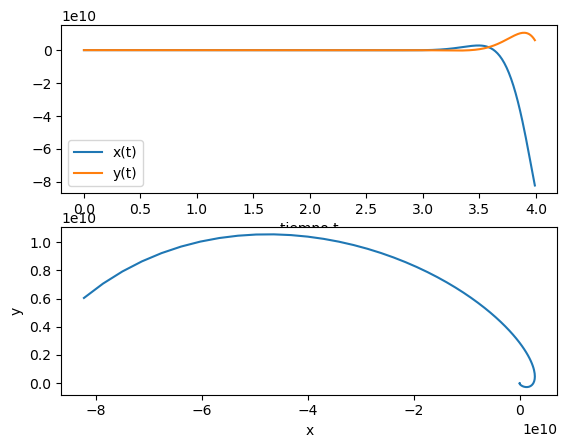

In [278]:
#Figuras para las soluciones de x y y
fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('')
#Datos de las figuras
ax1.plot(tt,xt,tt,yt)
ax1.set(xlabel='tiempo t')
ax1.legend(['x(t)', 'y(t)'])
ax2.plot(xt, yt)
ax2.set(xlabel='x',ylabel='y')
plt.show()

# 9. Ecuación de Airy

In [281]:
#Importación de las librerías
import sympy as sp #métodos numéricos
import numpy as np #vectores
import scipy as pp #calculos simbólicos
import matplotlib as mpl
import matplotlib.pyplot as plt #generación de gráficos

In [283]:
#Definición de la variable independiente y dependiente
t = sp.symbols('t')
y=sp.Function('y')

In [285]:
#Escribimos la ecuación y la imprimimos
ode9=sp.Eq(sp.Derivative(y(t),t,t)-t*y(t),0)
ode9

Eq(-t*y(t) + Derivative(y(t), (t, 2)), 0)

In [287]:
#Solución de la ecuación
sol9=sp.dsolve(ode9,y(t))
sol9

Eq(y(t), C1*airyai(t) + C2*airybi(t))

In [289]:
#Solución de la ecuación en series de potencias centradas en cero
sols9 = sp.dsolve(ode9,hint='2nd_power_series_ordinary')
sols9

Eq(y(t), C2*(t**3/6 + 1) + C1*t*(t**3/12 + 1) + O(t**6))

In [291]:
#Obtención de las constantes
constants=sp.solve([sols9.rhs.subs(t,0)-1,sols9.rhs.diff(t,1).subs(t,0)-1])
#Impresión de la solución
ysol=sp.expand(sols9.rhs.subs(constants))
ysol

1 + t + t**3/6 + t**4/12 + O(t**6)

In [294]:
#Solución de la ecuación en series de potencias centradas en uno
s9=sp.simplify(sp.series(sol9.rhs,t,1))
#Obtención de las constantes
constants=sp.solve([s9.subs(t,1)-1,s9.diff(t,1).subs(t,1)-1])
#Solución con las constantes
ss9=s9.subs(constants)
#Simplificación
sp.simplify(sp.series(ss9,t,1,6))

(t - 1)**2/2 + (t - 1)**3*airyaiprime(1)*airybi(1)/(3*airyaiprime(1)*airybi(1) - 3*airyai(1)*airybiprime(1)) - (t - 1)**3*airyai(1)*airybiprime(1)/(3*airyaiprime(1)*airybi(1) - 3*airyai(1)*airybiprime(1)) + (t - 1)**4*airyaiprime(1)*airybi(1)/(8*airyaiprime(1)*airybi(1) - 8*airyai(1)*airybiprime(1)) - (t - 1)**4*airyai(1)*airybiprime(1)/(8*airyaiprime(1)*airybi(1) - 8*airyai(1)*airybiprime(1)) + (t - 1)**5*airyaiprime(1)*airybi(1)/(24*airyaiprime(1)*airybi(1) - 24*airyai(1)*airybiprime(1)) - (t - 1)**5*airyai(1)*airybiprime(1)/(24*airyaiprime(1)*airybi(1) - 24*airyai(1)*airybiprime(1)) + t*airyaiprime(1)*airybi(1)/(airyaiprime(1)*airybi(1) - airyai(1)*airybiprime(1)) - t*airyai(1)*airybiprime(1)/(airyaiprime(1)*airybi(1) - airyai(1)*airybiprime(1)) + O((t - 1)**6, (t, 1))

In [296]:
#Impresión de la solución
ss9

(airyai(1) - airyaiprime(1))*airybi(1)/(airyai(1)*airybiprime(1) - airyaiprime(1)*airybi(1)) + (-airybi(1) + airybiprime(1))*airyai(1)/(airyai(1)*airybiprime(1) - airyaiprime(1)*airybi(1)) + (t - 1)*((-airybi(1) + airybiprime(1))*airyaiprime(1)/(airyai(1)*airybiprime(1) - airyaiprime(1)*airybi(1)) + (airyai(1) - airyaiprime(1))*airybiprime(1)/(airyai(1)*airybiprime(1) - airyaiprime(1)*airybi(1))) + (t - 1)**2*((-airybi(1) + airybiprime(1))*airyai(1)/(airyai(1)*airybiprime(1) - airyaiprime(1)*airybi(1)) + (airyai(1) - airyaiprime(1))*airybi(1)/(airyai(1)*airybiprime(1) - airyaiprime(1)*airybi(1)))/2 + (t - 1)**3*((-airybi(1) + airybiprime(1))*airyai(1)/(airyai(1)*airybiprime(1) - airyaiprime(1)*airybi(1)) + (-airybi(1) + airybiprime(1))*airyaiprime(1)/(airyai(1)*airybiprime(1) - airyaiprime(1)*airybi(1)) + (airyai(1) - airyaiprime(1))*airybiprime(1)/(airyai(1)*airybiprime(1) - airyaiprime(1)*airybi(1)) + (airyai(1) - airyaiprime(1))*airybi(1)/(airyai(1)*airybiprime(1) - airyaiprime(1)*a

# 10. Campo de direcciones de una ecuación diferencial

In [299]:
#Importación de las librerías
import sympy as sp #métodos numéricos
import numpy as np #vectores
import matplotlib as mpl
import matplotlib.pyplot as plt #generación de gráficos

In [301]:
#Definición de una malla
x,y = np.meshgrid(np.linspace(-2,3,15),np.linspace(-2,3,15))

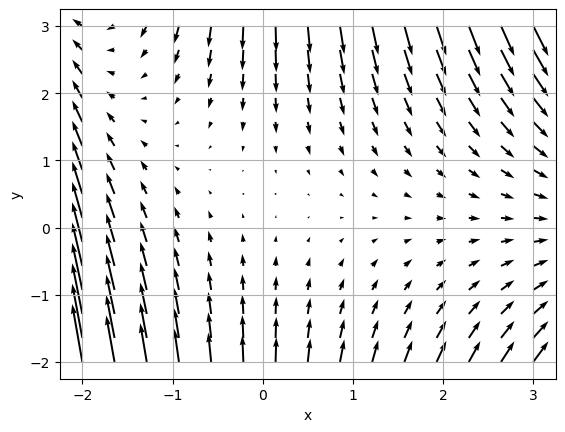

In [303]:
#Condiciones para gráficar la malla
plt.quiver(x,y,x,np.exp(-x)-2*y)
plt.grid('on')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# 12. Problema de valor inicial para una ecuacion no lineal (solución numérica)

## Al final se encuentra el ejemplo 11

In [315]:
#Importación de las librerías
import sympy as sp #métodos numéricos
import numpy as np #vectores
from scipy.integrate import odeint #para hallar soluciones numéricas
import matplotlib as mpl
import matplotlib.pyplot as plt #generación de gráficos

In [317]:
#Definición de las función seno
sin = np.sin

In [321]:
#Condición inicial
y0 = 1
#"LINSPACE genera una matriz de números que se distribuyen de manera uniforme dentro de un intervalo especificado"
t=np.linspace(0,20)

In [323]:
#Función en cuestión
def model(y,t):
    dydt=sin(y*y)
    return dydt

In [327]:
#Variable dependiente del tiempo con condición inicial y basada en el modelo anterior
y=odeint(model,y0,t)

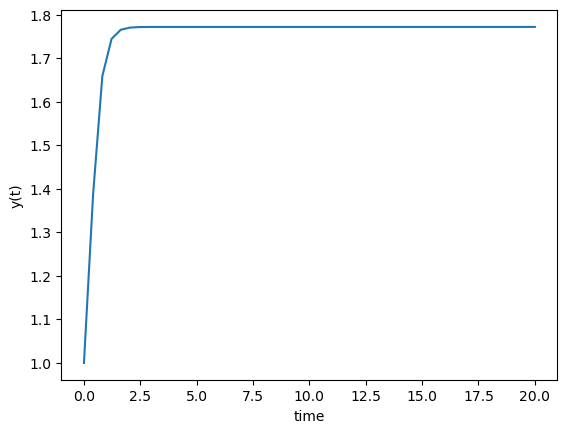

In [329]:
#Datos del gráfico
plt.plot(t,y)
plt.xlabel('time')
plt.ylabel('y(t)')
plt.show()

# 11. Un sistema no lineal (depredador -presa)

In [334]:
#Importación de librerías
import sympy as sp #métodos numéricos
import numpy as np #vectores
    #Funcionalidades de numpy y matplotlib (entorno similar a matlab)
import pylab
from pylab import *

In [336]:
#Expresamos x'(t) y y'(t) en una matriz
nodos = np.array([[0, 0, 1, 0.5], [0, 0.75, 0, 0.5]])
nodos

array([[0.  , 0.  , 1.  , 0.5 ],
       [0.  , 0.75, 0.  , 0.5 ]])

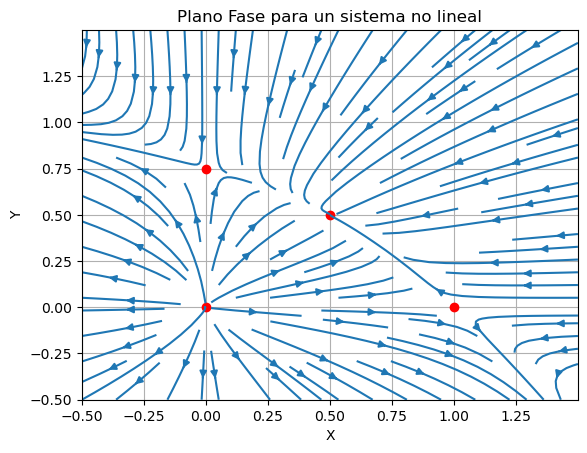

In [338]:
#Gráfica
    #Definimos los ejes en relación con las variables
xlabel('X')
ylabel('Y')
    #Título del gráfico
title('Plano Fase para un sistema no lineal')
    #Valores para el gráfico (rango, dominio, además de los valores de las expresiones dadas
plot(nodos[0], nodos[1], 'ro')
xvalues,yvalues=meshgrid(arange(-.5,1.5,0.001), arange(-0.5,1.5,0.001))
xdot = xvalues*(1-xvalues-yvalues)
ydot = yvalues*(0.75-0.5*xvalues-yvalues)
streamplot(xvalues, yvalues, xdot, ydot)

grid();  #Líneas de cuadrícula
show()

In [340]:
#Declaración de las variables
x, y = sp.symbols('x y')
#Solución del sistema
pts=sp.solve([x*(1-x-y),y*(0.75-0.5*x-y)],{x,y})
#Evaluación para encontrar puntos críticos el valor de la función en ese punto
pts[0]

{x: 0.0, y: 0.0}

In [342]:
pts[1]

{x: 0.0, y: 0.750000000000000}

In [344]:
pts[2]

{x: 0.500000000000000, y: 0.500000000000000}

In [346]:
pts[3]

{x: 1.00000000000000, y: 0.0}

In [348]:
#Cálculo del Jacobiano
X=sp.Matrix([x*(1-x-y),y*(0.75-0.5*x-y)])
Y=sp.Matrix([x,y])
A=X.jacobian(Y)
#Impresión de la matriz
A

Matrix([
[-2*x - y + 1,                  -x],
[      -0.5*y, -0.5*x - 2*y + 0.75]])

In [350]:
#Evaluación en los valores de los puntos críticos para encontrar valores propios
A.subs(pts[0]).eigenvects()

[(1.00000000000000,
  1,
  [Matrix([
   [1.0],
   [  0]])]),
 (0.750000000000000,
  1,
  [Matrix([
   [  0],
   [1.0]])])]

In [352]:
A.subs(pts[1]).eigenvects()

[(0.250000000000000,
  1,
  [Matrix([
   [ 0.936329177569045],
   [-0.351123441588392]])]),
 (-0.750000000000000,
  1,
  [Matrix([
   [-3.31455461204681e-65],
   [     1.06800046816469]])])]

In [354]:
A.subs(pts[2]).eigenvects()

[(-0.853553390593274,
  1,
  [Matrix([
   [0.816496580927726],
   [0.577350269189626]])]),
 (-0.146446609406726,
  1,
  [Matrix([
   [-0.866025403784439],
   [ 0.612372435695794]])])]

In [356]:
A.subs(pts[3]).eigenvects()

[(-1.00000000000000,
  1,
  [Matrix([
   [1.0],
   [  0]])]),
 (0.250000000000000,
  1,
  [Matrix([
   [-0.8],
   [ 1.0]])])]

In [358]:
#"los calculos analíticos son corroborados con el gráfico obtenido"